In [1]:
import datetime as dt
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 35)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
from IPython.display import display

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_ = pd.read_excel("D:/MVK/week3/Dosyalar/online_retail_II.xlsx",
                    sheet_name="Year 2009-2010")


In [3]:
df = df_.copy()
df.isnull().sum()


Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [5]:
df = df.dropna() # eksik verilerimizi sildik

In [6]:
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95000,13085.00000,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75000,13085.00000,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75000,13085.00000,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10000,13085.00000,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25000,13085.00000,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65000,13085.00000,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25000,13085.00000,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95000,13085.00000,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55000,13085.00000,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75000,13085.00000,United Kingdom


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417534 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      417534 non-null  object        
 1   StockCode    417534 non-null  object        
 2   Description  417534 non-null  object        
 3   Quantity     417534 non-null  int64         
 4   InvoiceDate  417534 non-null  datetime64[ns]
 5   Price        417534 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      417534 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 28.7+ MB


In [8]:
df = df[~df["Invoice"].str.contains("C",na = False)]
df["Total_price"] = df["Price"] * df["Quantity"]


Invoice'un içerisinde C bulunanlarları kaldırdık. Çünkü faturasının içinde c olanlar iade içerdiği anlamına gelmektedir. Bu da  analizimizi yanlış yönlendirecek olduğundan kaldırdık

Ve her bir faturada her ürün için ödenen toplam ücreti hesapladık

In [9]:
df["Customer ID"] = df["Customer ID"].astype(int)
# Customer ID'leri integer hale getirdim

In [10]:
### Kategorik ürünlerin incelemesi
cat_cols = [col for col in df.columns if df[col].dtypes == "object" ] 

In [11]:
for col in cat_cols:
    print("Column: {} \nUnique value counts: {} \n ".format(col,df[col].nunique()))
    print(df[col].value_counts(),"\n\n")

Column: Invoice 
Unique value counts: 19215 
 
500356    270
511522    255
531382    251
507235    250
511051    248
         ... 
492424      1
492430      1
518675      1
508868      1
495795      1
Name: Invoice, Length: 19215, dtype: int64 


Column: StockCode 
Unique value counts: 4017 
 
85123A    3153
85099B    1742
22423     1706
21212     1586
21232     1407
          ... 
85230C       1
20791        1
22886        1
17011E       1
22883        1
Name: StockCode, Length: 4017, dtype: int64 


Column: Description 
Unique value counts: 4444 
 
WHITE HANGING HEART T-LIGHT HOLDER    3153
REGENCY CAKESTAND 3 TIER              1706
STRAWBERRY CERAMIC TRINKET BOX        1407
ASSORTED COLOUR BIRD ORNAMENT         1369
HOME BUILDING BLOCK WORD              1219
                                      ... 
S/16 BLACK SHINY/MAT BAUBLES             1
F.FAIRY S/3 SML CANDLE, LAVENDER         1
TEATIME ROUND CAKE TINS                  1
JAM JAR WITH BLUE LID                    1
HOLLYHOCK SQU

In [12]:
df. head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total_price
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95000,13085,United Kingdom,83.40000
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75000,13085,United Kingdom,81.00000
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75000,13085,United Kingdom,81.00000
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10000,13085,United Kingdom,100.80000
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25000,13085,United Kingdom,30.00000
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65000,13085,United Kingdom,39.60000
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25000,13085,United Kingdom,30.00000
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95000,13085,United Kingdom,59.50000
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55000,13085,United Kingdom,30.60000
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75000,13085,United Kingdom,45.00000


### 489434 nolu faturayı inceleyelim
13085 numaralı müşterimiz bu faturada 7 farklı ürün satın almıştır.

Price kısmı her bir ürünün birim fiyatıdır 

Total price ise o ürün grubuna totalde ne kadar para verdi

##### Fakat burada bu faturadaki total ücret bulunmamaktadır

Müşteri ID'lerine göre groupby alarak herbir müşteri için istediğimiz sonuçları buluyoruz.

Müşterinin bize bıraktığı bütün paranın toplamı, her bir alışverişte bıraktığı ortalama para, bizden yaptığı alışveriş sayısı.
Müşterinin bizden aldığı ürün adedinin toplamı, her alışverişte ortalama olarak aldığı ürün sayısı
Müşterimiz hangi ülkeden (Yurdışına çıkıp oradan da alışveriş yapma durumu olabileceğinden alışveriş en çok hangi ülkeden yaptığını alıyoruz.)




### Müşteri Bazlı Analiz

In [13]:
df_customer = df.groupby("Customer ID").agg({"Total_price":["sum","mean","count"],"Quantity":["sum","mean"],"Country": lambda x:x.value_counts().index[0]}).\
            sort_values(("Total_price","sum"),ascending = False)

df_customer.reset_index(inplace = True)
df_customer.head(10)

Customer ID  Total_price                 Quantity                   Country
                       sum      mean count      sum      mean        <lambda>
0       18102 349164.35000 556.88094   627   124216 198.11164  United Kingdom
1       14646 248396.50000 140.02057  1774   170342  96.02142     Netherlands
2       14156 196566.74000  74.23215  2648   108107  40.82591            EIRE
3       14911 152147.57000  27.31554  5570    69722  12.51741            EIRE
4       13694 131443.19000 137.34921   957   125893 131.54963  United Kingdom
5       17511  84541.17000  89.17845   948    55107  58.12975  United Kingdom
6       15061  83284.38000 142.61024   584    51791  88.68322  United Kingdom
7       16684  80489.21000 182.51522   441    54555 123.70748  United Kingdom
8       16754  65500.07000 467.85764   140    63551 453.93571  United Kingdom
9       17949  60117.60000 691.00690    87    30112 346.11494  United Kingdom

Buradaki sütun isimleri kötü durduğundan dolayı onu düzeltme işlemlerini yapıyoruz

In [14]:
df_customer.columns = df_customer.columns.droplevel(0)


In [15]:
df_customer.columns = ["Customer_ID","Total_Price_sum","Total_Price_mean","Frequency","Quantity_sum","Quantity_mean","Country"]

In [16]:
df_customer.head(10)

,Customer_ID,Total_Price_sum,Total_Price_mean,Frequency,Quantity_sum,Quantity_mean,Country
0,18102,349164.35000,556.88094,627,124216,198.11164,United Kingdom
1,14646,248396.50000,140.02057,1774,170342,96.02142,Netherlands
2,14156,196566.74000,74.23215,2648,108107,40.82591,EIRE
3,14911,152147.57000,27.31554,5570,69722,12.51741,EIRE
4,13694,131443.19000,137.34921,957,125893,131.54963,United Kingdom
5,17511,84541.17000,89.17845,948,55107,58.12975,United Kingdom
6,15061,83284.38000,142.61024,584,51791,88.68322,United Kingdom
7,16684,80489.21000,182.51522,441,54555,123.70748,United Kingdom
8,16754,65500.07000,467.85764,140,63551,453.93571,United Kingdom
9,17949,60117.60000,691.00690,87,30112,346.11494,United Kingdom


##### Müşterilerin harcadıkları parayı daha kolay anlamak için oranlama işlemi yapıyoruz

In [17]:
df_customer["Total_Price_Ratio"] = df_customer["Total_Price_sum"] * 100 / df_customer["Total_Price_sum"].sum()

In [18]:
df_customer["Total_Price_cumsum_ratio"] = df_customer["Total_Price_Ratio"].cumsum()

In [19]:
df_customer.head(7)

,Customer_ID,Total_Price_sum,Total_Price_mean,Frequency,Quantity_sum,Quantity_mean,Country,Total_Price_Ratio,Total_Price_cumsum_ratio
0,18102,349164.35000,556.88094,627,124216,198.11164,United Kingdom,3.95340,3.95340
1,14646,248396.50000,140.02057,1774,170342,96.02142,Netherlands,2.81246,6.76586
2,14156,196566.74000,74.23215,2648,108107,40.82591,EIRE,2.22562,8.99148
3,14911,152147.57000,27.31554,5570,69722,12.51741,EIRE,1.72268,10.71416
4,13694,131443.19000,137.34921,957,125893,131.54963,United Kingdom,1.48826,12.20242
5,17511,84541.17000,89.17845,948,55107,58.12975,United Kingdom,0.95721,13.15964
6,15061,83284.38000,142.61024,584,51791,88.68322,United Kingdom,0.94298,14.10262


In [20]:
print("müşteri sayımız :",df_customer.shape[0])
print("%50'lik harcamayı yapan müşterilerimiz :",len(df_customer[df_customer["Total_Price_cumsum_ratio"]<50]))

# 4314 müşterimiz var fakat biz sadece 240 müşterimize %50'lik satışımızı yapıyoruz
# ilk 240 müşterimiz  geriye kalan 4074 müşteriyle aynı parayı harcıyor.

müşteri sayımız : 4314
%50'lik harcamayı yapan müşterilerimiz : 240


#### Pareto Analizi (80 - 20 Kuralı)

Pareto analizine göre birçok olayda sonuçların %80'i nedenlerin %20'sinden kaynaklanmaktadır varsayımı vardır. (Tabii bu oranlar değişkenlik gösterebilir, ana mantık daha az sorun çözerek daha büyük etkende fayda sağlamaktır.)

Bize parasal anlamda %80'i karşılayan müşterilerimizi bulalım

In [21]:
df_yuzde_80 = df_customer[df_customer["Total_Price_cumsum_ratio"]<80]



In [22]:
df_yuzde_80

,Customer_ID,Total_Price_sum,Total_Price_mean,Frequency,Quantity_sum,Quantity_mean,Country,Total_Price_Ratio,Total_Price_cumsum_ratio
0,18102,349164.35000,556.88094,627,124216,198.11164,United Kingdom,3.95340,3.95340
1,14646,248396.50000,140.02057,1774,170342,96.02142,Netherlands,2.81246,6.76586
2,14156,196566.74000,74.23215,2648,108107,40.82591,EIRE,2.22562,8.99148
3,14911,152147.57000,27.31554,5570,69722,12.51741,EIRE,1.72268,10.71416
4,13694,131443.19000,137.34921,957,125893,131.54963,United Kingdom,1.48826,12.20242
...,...,...,...,...,...,...,...,...,...
1170,13156,1586.54000,15.25519,104,914,8.78846,United Kingdom,0.01796,79.92777
1171,17679,1585.50000,31.08824,51,1026,20.11765,United Kingdom,0.01795,79.94572
1172,17905,1583.28000,11.55679,137,966,7.05109,United Kingdom,0.01793,79.96365
1173,14327,1583.28000,16.84340,94,1157,12.30851,United Kingdom,0.01793,79.98158


In [23]:
len(df_yuzde_80) * 100 / len(df_customer)

27.236903106165972

Müşterilerimizin %27'sine, %80'lik kazancımızı sağlamaktayız.

### Ürün - Ülke Bazlı Analiz

Bazı ürünler bazı ülkeler veya bölgelerde daha fazla satabilir. Bunlara göre bir pazarlama stratejisi geliştirmek gibi amaçlarımız olabilir. 
Bu yüzden ülke ürün kırılımına bakarak bazı kararlar vermemiz gerekebilir.

In [24]:
df_urun_ulke = df.groupby(["Country","Description"]).agg({"Quantity":"sum","Total_price":"sum"})
df_urun_ulke

Quantity  Total_price
Country     Description                                             
Australia   12 PENCILS SMALL TUBE RED SPOTTY         24     15.60000
            20 DOLLY PEGS RETROSPOT                  36     45.00000
            3 HOOK HANGER MAGIC GARDEN               24     46.80000
            3 TIER CAKE TIN GREEN AND CREAM          16    204.00000
            3 TIER CAKE TIN RED AND CREAM            16    204.00000
...                                                 ...          ...
West Indies VINTAGE BEAD PINK SCARF                   3     23.85000
            WHITE AND BLUE CERAMIC OIL BURNER         6      7.50000
            WOODLAND PARTY BAG + STICKER SET          1      1.65000
            WOVEN BERRIES CUSHION COVER               2      9.90000
            WOVEN FROST CUSHION COVER                 2      9.90000

[18897 rows x 2 columns]

In [25]:
df_urun_ulke.reset_index(inplace = True)
df_urun_ulke

,Country,Description,Quantity,Total_price
0,Australia,12 PENCILS SMALL TUBE RED SPOTTY,24,15.60000
1,Australia,20 DOLLY PEGS RETROSPOT,36,45.00000
2,Australia,3 HOOK HANGER MAGIC GARDEN,24,46.80000
3,Australia,3 TIER CAKE TIN GREEN AND CREAM,16,204.00000
4,Australia,3 TIER CAKE TIN RED AND CREAM,16,204.00000
...,...,...,...,...
18892,West Indies,VINTAGE BEAD PINK SCARF,3,23.85000
18893,West Indies,WHITE AND BLUE CERAMIC OIL BURNER,6,7.50000
18894,West Indies,WOODLAND PARTY BAG + STICKER SET,1,1.65000
18895,West Indies,WOVEN BERRIES CUSHION COVER,2,9.90000


In [26]:
df_urun_ulke.columns= ["Country","Description","Quantity_sum","Total_price_sum"]
df_urun_ulke


,Country,Description,Quantity_sum,Total_price_sum
0,Australia,12 PENCILS SMALL TUBE RED SPOTTY,24,15.60000
1,Australia,20 DOLLY PEGS RETROSPOT,36,45.00000
2,Australia,3 HOOK HANGER MAGIC GARDEN,24,46.80000
3,Australia,3 TIER CAKE TIN GREEN AND CREAM,16,204.00000
4,Australia,3 TIER CAKE TIN RED AND CREAM,16,204.00000
...,...,...,...,...
18892,West Indies,VINTAGE BEAD PINK SCARF,3,23.85000
18893,West Indies,WHITE AND BLUE CERAMIC OIL BURNER,6,7.50000
18894,West Indies,WOODLAND PARTY BAG + STICKER SET,1,1.65000
18895,West Indies,WOVEN BERRIES CUSHION COVER,2,9.90000


In [27]:
df_urun_ulke.sort_values("Total_price_sum",ascending = False,inplace = True)

Her bir ürün grubundan o ülkede kaçar tane satıldığını ve ona totalde ne kadar para verildiğini bulmuş olduk

Şimdi o ürün grubunun hem adet olarak hem de parasal değere olarak o ülkedeki oranına bakalım.
Quantiy_sum'ı o ülkede satılan total ürün miktarına böleceğiz
Total_price_sum'ı da o ülkedeki toplam alışverişin parasal değerine böleceğiz

In [28]:
df_ulke_sum = df_urun_ulke.groupby("Country").agg({"Quantity_sum":"sum","Total_price_sum":"sum"})
df_ulke_sum.tail(20)
# Burada Country'e göre groupby aldıktan sonra toplamları aldık. Böylelikle o ülkedeki 
# toplam ürün satış adedini ve o ülkedeki satışın toplam parasal değerini bulmuş olduk

,Quantity_sum,Total_price_sum
Country,,
Japan,7311,9722.02000
Korea,700,1118.51000
Lithuania,2306,4892.68000
Malta,1549,5373.50000
Netherlands,183680,268786.00000
Nigeria,103,140.39000
Norway,7867,23944.18000
Poland,2144,3567.80000
Portugal,11989,23845.41000


In [29]:
df_ulke_sum.reset_index(inplace = True)

In [30]:
df_urun_ulke = df_urun_ulke.merge(df_ulke_sum,on ="Country",how = "inner")
df_urun_ulke

,Country,Description,Quantity_sum_x,Total_price_sum_x,Quantity_sum_y,Total_price_sum_y
0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,51679,137970.11000,4449351,7414755.96300
1,United Kingdom,REGENCY CAKESTAND 3 TIER,10681,123195.60000,4449351,7414755.96300
2,United Kingdom,ASSORTED COLOUR BIRD ORNAMENT,41529,65770.65000,4449351,7414755.96300
3,United Kingdom,Manual,2580,53464.76000,4449351,7414755.96300
4,United Kingdom,JUMBO BAG RED RETROSPOT,27030,47330.70000,4449351,7414755.96300
...,...,...,...,...,...,...
18892,Brazil,60 TEATIME FAIRY CAKE CASES,2,1.10000,189,268.27000
18893,Brazil,SKULLS STICKERS,1,0.85000,189,268.27000
18894,Brazil,"KEY FOB , BACK DOOR",1,0.65000,189,268.27000
18895,Brazil,"KEY FOB , SHED",1,0.65000,189,268.27000


In [31]:
df_urun_ulke.columns = ["Country","Description","Quantity_description","Total_price","Country_quantity","Country_price"]

In [32]:
df_urun_ulke["Total_price_ratio"] = df_urun_ulke["Total_price"] * 100 / df_urun_ulke["Country_price"]
#df_urun_ulke.sort_values(by = "Total_price_ratio",inplace = True,ascending = False)

In [33]:
df_urun_ulke

,Country,Description,Quantity_description,Total_price,Country_quantity,Country_price,Total_price_ratio
0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,51679,137970.11000,4449351,7414755.96300,1.86075
1,United Kingdom,REGENCY CAKESTAND 3 TIER,10681,123195.60000,4449351,7414755.96300,1.66149
2,United Kingdom,ASSORTED COLOUR BIRD ORNAMENT,41529,65770.65000,4449351,7414755.96300,0.88702
3,United Kingdom,Manual,2580,53464.76000,4449351,7414755.96300,0.72106
4,United Kingdom,JUMBO BAG RED RETROSPOT,27030,47330.70000,4449351,7414755.96300,0.63833
...,...,...,...,...,...,...,...
18892,Brazil,60 TEATIME FAIRY CAKE CASES,2,1.10000,189,268.27000,0.41003
18893,Brazil,SKULLS STICKERS,1,0.85000,189,268.27000,0.31684
18894,Brazil,"KEY FOB , BACK DOOR",1,0.65000,189,268.27000,0.24229
18895,Brazil,"KEY FOB , SHED",1,0.65000,189,268.27000,0.24229


In [34]:
df_urun_ulke["total_price_cumsum"] = df_urun_ulke.groupby("Country").agg({"Total_price_ratio":"cumsum"})
df_urun_ulke

,Country,Description,Quantity_description,Total_price,Country_quantity,Country_price,Total_price_ratio,total_price_cumsum
0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,51679,137970.11000,4449351,7414755.96300,1.86075,1.86075
1,United Kingdom,REGENCY CAKESTAND 3 TIER,10681,123195.60000,4449351,7414755.96300,1.66149,3.52224
2,United Kingdom,ASSORTED COLOUR BIRD ORNAMENT,41529,65770.65000,4449351,7414755.96300,0.88702,4.40927
3,United Kingdom,Manual,2580,53464.76000,4449351,7414755.96300,0.72106,5.13033
4,United Kingdom,JUMBO BAG RED RETROSPOT,27030,47330.70000,4449351,7414755.96300,0.63833,5.76866
...,...,...,...,...,...,...,...,...
18892,Brazil,60 TEATIME FAIRY CAKE CASES,2,1.10000,189,268.27000,0.41003,98.99355
18893,Brazil,SKULLS STICKERS,1,0.85000,189,268.27000,0.31684,99.31040
18894,Brazil,"KEY FOB , BACK DOOR",1,0.65000,189,268.27000,0.24229,99.55269
18895,Brazil,"KEY FOB , SHED",1,0.65000,189,268.27000,0.24229,99.79498


Burada çok fazla sütun bulunmakta ve yorumlamayı zorlaştırmaktadır. Eğer bizim ihtiyacımız satılan ürünün adedi ile alakalı bir bilgiyse bu dataframe'i

kullanabiliriz. Fakat bizim amacımız satılan ürünlerin maddi değerlerine göre bir analiz  olduğu için bazı sütunları kaldıracağım. 

In [35]:
df_urun_ulke.drop(["Quantity_description","Country_quantity"],axis = 1,inplace = True)

### Haritalama

Burada kuzey avrupaya ait ülkelerin 

In [36]:
def urun_ulke(Country):
    dataframe = df_urun_ulke[df_urun_ulke["Country"] == Country]
    return dataframe 

# istediğimiz ülkeyi atayabilmek için bir fonksiyon yazıyoruz.

In [37]:
df_denmark = urun_ulke("Denmark")
df_denmark.head(5)


,Country,Description,Total_price,Country_price,Total_price_ratio,total_price_cumsum
10745,Denmark,SMALL FAIRY CAKE FRIDGE MAGNETS,6467.60000,50906.85000,12.70477,12.70477
10746,Denmark,BLACK AND WHITE PAISLEY FLOWER MUG,2516.40000,50906.85000,4.94315,17.64792
10747,Denmark,SET/6 STRAWBERRY PAPER CUPS,1296.00000,50906.85000,2.54583,20.19375
10748,Denmark,SET/6 WOODLAND PAPER PLATES,1296.00000,50906.85000,2.54583,22.73957
10749,Denmark,SET/6 WOODLAND PAPER CUPS,1274.40000,50906.85000,2.50340,25.24297


#### Örnek Çıktıyı okuma

(İlk satırı inceleyelim)

Bu dataframe'in sıralaması Total_price'a göre büyükten küçüğe doğru yapılmış. Danimarka'da "SMALL FAIRY CAKE FRIDGE MAGNETS" ürününden totalde 6467.67 dolar (veya hangi para birimiyse) para kazanmışız. Bu da Danimarkaya yaptığımız satış tutarının %12.7'sini oluşturmaktadır.

In [38]:
df_denmark.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 10745 to 11037
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             293 non-null    object 
 1   Description         293 non-null    object 
 2   Total_price         293 non-null    float64
 3   Country_price       293 non-null    float64
 4   Total_price_ratio   293 non-null    float64
 5   total_price_cumsum  293 non-null    float64
dtypes: float64(4), object(2)
memory usage: 16.0+ KB


In [39]:
top_customer = len(df_denmark[df_denmark['total_price_cumsum']<80])
total_customer = df_denmark.shape[0]


In [40]:
total_customer

293

In [41]:
df_denmark[df_denmark['total_price_cumsum']<80]

,Country,Description,Total_price,Country_price,Total_price_ratio,total_price_cumsum
10745,Denmark,SMALL FAIRY CAKE FRIDGE MAGNETS,6467.60000,50906.85000,12.70477,12.70477
10746,Denmark,BLACK AND WHITE PAISLEY FLOWER MUG,2516.40000,50906.85000,4.94315,17.64792
10747,Denmark,SET/6 STRAWBERRY PAPER CUPS,1296.00000,50906.85000,2.54583,20.19375
10748,Denmark,SET/6 WOODLAND PAPER PLATES,1296.00000,50906.85000,2.54583,22.73957
10749,Denmark,SET/6 WOODLAND PAPER CUPS,1274.40000,50906.85000,2.50340,25.24297
...,...,...,...,...,...,...
10813,Denmark,BLUE CHERRY BLOSSOM CUP & SAUCER,166.50000,50906.85000,0.32707,78.73805
10814,Denmark,PLASTERS IN TIN CIRCUS PARADE,158.40000,50906.85000,0.31116,79.04920
10815,Denmark,RETRO SISTERS EXPRESSO CUPS,151.20000,50906.85000,0.29701,79.34622
10816,Denmark,PINK DOUGHNUT TRINKET POT,148.80000,50906.85000,0.29230,79.63852


In [42]:
print(f" Alışverişlerin %80'i yapan müşteri sayımız: {top_customer} \n Alışverişin %80'ini yapan müşterilerimizin oranı ise: %{100*top_customer/total_customer}" )

 Alışverişlerin %80'i yapan müşteri sayımız: 73 
 Alışverişin %80'ini yapan müşterilerimizin oranı ise: %24.914675767918087


### HARİTA OLUŞTURMA

Bazı ülkelerdeki en çok kazanç sağladığımız ürünleri harita üzerinden göstererek bölgeye göre pazarlama işlemleri yürütülebilir.

In [43]:
my_list = []
for COUNTRY in ["Denmark","Finland","Sweden","Norway","Lithuania"]:
    new_df = urun_ulke(COUNTRY).iloc[:1]
    new_df = new_df.drop("total_price_cumsum",axis = 1)
    my_list.append(new_df)
    

In [44]:
kuzey_avrupa = pd.concat(my_list)
kuzey_avrupa

,Country,Description,Total_price,Country_price,Total_price_ratio
10745,Denmark,SMALL FAIRY CAKE FRIDGE MAGNETS,6467.60000,50906.85000,12.70477
16720,Finland,PINK 3 PIECE MINI DOTS CUTLERY SET,555.66000,7379.46000,7.52982
13812,Sweden,POSTAGE,2182.00000,53171.39000,4.10371
8188,Norway,Manual,13916.34000,23944.18000,58.11993
18205,Lithuania,FELTCRAFT PRINCESS LOLA DOLL,180.00000,4892.68000,3.67897


In [45]:
## Ülkelerin enlem - boylam bilgilerini ekledik. Başkenleriin merkezlerini kabul ettik
kuzey_avrupa.loc[:,"Enlem"] = [55.66 ,60.16, 59.33, 59.91, 54.68]
kuzey_avrupa.loc[:,"Boylam"] = [12.58 ,24.93, 18.05, 10.75, 25.31 ]

In [46]:
kuzey_avrupa

,Country,Description,Total_price,Country_price,Total_price_ratio,Enlem,Boylam
10745,Denmark,SMALL FAIRY CAKE FRIDGE MAGNETS,6467.60000,50906.85000,12.70477,55.66000,12.58000
16720,Finland,PINK 3 PIECE MINI DOTS CUTLERY SET,555.66000,7379.46000,7.52982,60.16000,24.93000
13812,Sweden,POSTAGE,2182.00000,53171.39000,4.10371,59.33000,18.05000
8188,Norway,Manual,13916.34000,23944.18000,58.11993,59.91000,10.75000
18205,Lithuania,FELTCRAFT PRINCESS LOLA DOLL,180.00000,4892.68000,3.67897,54.68000,25.31000


In [47]:
import folium
m=folium.Map(location=[59,15],zoom_start=5)

"# Kuzey Avrupa haritası"
m

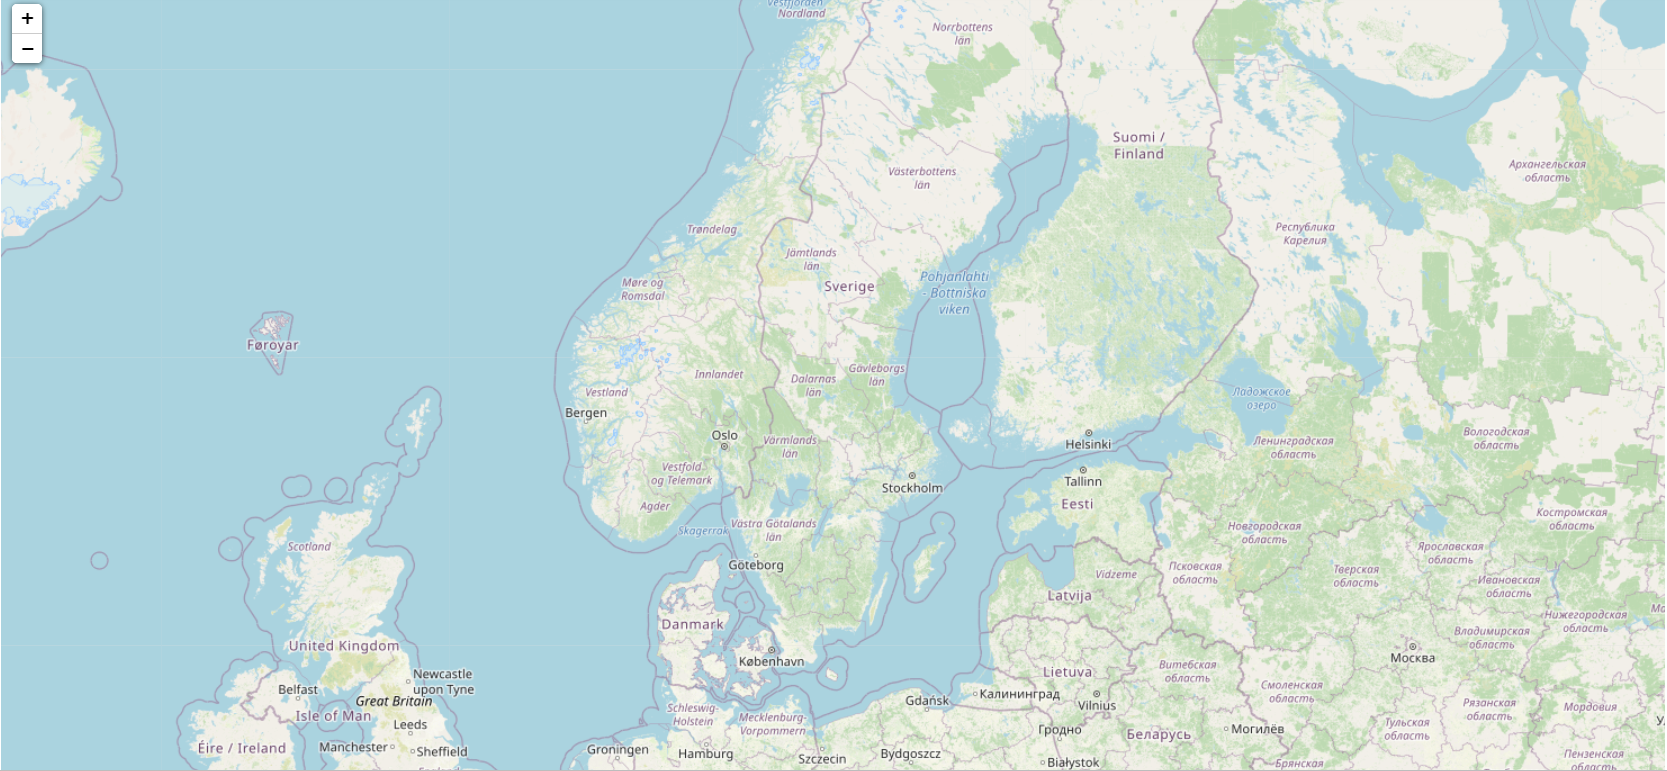

In [48]:
for i in range(5):
    folium.Marker(location=[kuzey_avrupa.iloc[i][5],kuzey_avrupa.iloc[i][6]],tooltip="click for more information",
              popup=kuzey_avrupa.iloc[i],
              icon=folium.Icon(color="red")).add_to(m)   
m